In [112]:
import os
import imp
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math

###############################################################
# LINUX PATH

sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname("/home/fotonica04/Documentos/GitHub/MMI-photonics")) #Current directory


###############################################################
# WINDOWS PATH

# spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
# lumapi = importlib.util.module_from_spec(spec_win)
# os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
# sys.path.append(os.path.dirname('C:/Users/Caio/Documents/GitHub/Photonics-training/Projects/MMI/Lumericalfiles/'))
# spec_win.loader.exec_module(lumapi)

#alteração 2

In [113]:
def CalculaMMI(largura, nf, nc, lambda0, modo, nimagens):
    pi = np.pi
    k0 = 2*pi/lambda0
    Wm = largura
    c0 = 299792458

    #modo TE:
    sigma = 0
    We = Wm + ((lambda0/pi) * ((nc/nf)**(2*sigma)) * (1/np.sqrt((nf**2)-(nc**2))))

    neff = nf - ((modo+1)**2*pi*lambda0)/(We**2*4*nf*k0)
    kc = (modo+1)*pi/We

    Lpi = nf*We**2/lambda0

    #Interferência restrita simétrica

    comprimento = 3*Lpi/4

    compN = comprimento/nimagens

    larguraTappers = (1/((2*nimagens)**(0.25)))*np.sqrt(lambda0*We/neff)

    posSaida = []
    for i in range(nimagens):
        posSaida.append(((i+1)*Wm/(nimagens+1)) - (Wm/2))


    posSaida = Wm/(nimagens+1)

    return compN, comprimento, larguraTappers, posSaida, We, Lpi





def DeletarObj(nome, lum):
    lum.select(nome)
    lum.delete()




def CriarRect(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, material, lum):
    
    lum.addrect()
    lum.set({
        "name": nome,
        "x min": Xmin,"y": Y,"z min": Zmin,
        "x max": Xmax, "y span": Yspan, "z max": Zmax,
        "material": material
        })




def CriarTP(nome, Xmin, Xmax, Y, Yspan1, Yspan2, Zmin, Zmax, material, lum):

    X = (Xmin + Xmax)/2
    Xspan = Xmax-Xmin
    Z = (Zmin + Zmax)/2
    Zspan = Zmax-Zmin

    lum.addobject("linear_taper")
    lum.set({
        "name": nome,
        "x": X, "y": Y, "z": Z,
        "thickness": Zspan, 
        "angle_side": 90, 
        "width_l": Yspan1,
        "width_r": Yspan2,
        "len": Xspan,
        "material": material
    })




def CriarMesh(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, propY, propZ, lum):
    lum.addmesh()
    lum.set({
        "name": nome,
        "x min": Xmin, "y": Y, "z min": Zmin,
        "x max": Xmax, "y span": Yspan, "z max": Zmax,
        "set equivalent index": True, "set mesh multiplier": True,
        "override x mesh": False, "y mesh multiplier": propY, "z mesh multiplier": propZ
        })




def altRect(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, material, lum):
    DeletarObj(nome, lum)
    CriarRect(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, material, lum)




def altTP(nome, Xmin, Xmax, Y, Yspan1, Yspan2, Zmin, Zmax, material, lum):
    DeletarObj(nome, lum)
    CriarTP(nome, Xmin, Xmax, Y, Yspan1, Yspan2, Zmin, Zmax, material, lum)




def altMesh(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, propY, propZ, lum):
    DeletarObj(nome, lum)
    CriarMesh(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, propY, propZ, lum)

In [172]:
lum = lumapi.MODE(filename='MMI_sweep1.lms')

In [154]:

inicioMMI = 0
#compMMI = 37.2947e-6
largMMI = 6e-6
zmin = 0
zspan = 220e-9
zspanMMI = 8e-6
ycentro = 0
parametros = CalculaMMI(largMMI, 3.476, 1.444, 1550e-9, 0, 3)



largWG = .45e-6
bufferWG = 4e-6
compTP = 5e-6
#largTP = 0.609367e-6
#posSaida = 1.5e-6

material = "Si (Silicon) - Palik";
BGmaterial = "SiO2 (Glass) - Palik";


nomes = ["MMImeio", "Entrada", "Saida1", "Saida2", "Saida3", "EntradaTP", "Saida1TP", "Saida2TP", "Saida3TP"]
mesh = ["meshE", "meshS1", "meshS2", "meshS3"]

ncellsTP = 20
nmodosTP = 10
nmodosMMI = 100
mcy = 375
mcz = 150

meshY = 2
meshZ = 4


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


compMMI = parametros[0]
largTP = parametros[2]
posSaida = parametros[3]


zmax = zmin + zspan
inicTPS = compMMI + inicioMMI
fimTPS = compTP + inicTPS
fimTPS1 = compTP + inicTPS
fimTPS2 = compTP + inicTPS
fimTPS3 = compTP + inicTPS
largTPE = largTP
largTPS1 = largTP
largTPS2 = largTP
largTPS3 = largTP
posSaida1 = ycentro + posSaida + 0.59e-6
posSaida2 = ycentro
posSaida3 = ycentro - posSaida - 0.55e-6

In [146]:
lum.switchtolayout()

altRect(nomes[0], inicioMMI, compMMI, ycentro, largMMI, zmin, zmax, material, lum)
altRect(nomes[1], inicioMMI-(compTP+bufferWG), inicioMMI-compTP, ycentro, largWG, zmin, zmax, material, lum)
altRect(nomes[2], fimTPS, fimTPS1+bufferWG, posSaida1, largWG, zmin, zmax, material, lum)
altRect(nomes[3], fimTPS, fimTPS2+bufferWG, posSaida2, largWG, zmin, zmax, material, lum)
altRect(nomes[4], fimTPS, fimTPS3+bufferWG, posSaida3, largWG, zmin, zmax, material, lum)
altTP(nomes[5], inicioMMI-compTP, inicioMMI, ycentro, largWG, largTPE, zmin, zmax, material, lum)
altTP(nomes[6], inicTPS, fimTPS1, posSaida1, largTPS1, largWG, zmin, zmax, material, lum)
altTP(nomes[7], inicTPS, fimTPS2, posSaida2, largTPS2, largWG, zmin, zmax, material, lum)
altTP(nomes[8], inicTPS, fimTPS3, posSaida3, largTPS3, largWG, zmin, zmax, material, lum)



In [118]:
lum.switchtolayout()
DeletarObj("EME", lum)

lum.addeme()
lum.set({
    "allow custom eigensolver settings":1, 
    "display cells":1, 
    "number of cell groups":3,

    "y min bc": "PML",
    "y max bc": "PML",
    "z min bc": "Symmetric",
    "z max bc": "PML"
})

lum.set({
    "mesh cells y": mcy,
    "mesh cells z": mcz,
    "group spans": np.transpose([compTP*0.25 + compTP, compMMI, compTP +compTP*0.25]),
    "cells":np.transpose([ncellsTP, 1, ncellsTP]),
    "subcell method":np.transpose([1, 0, 1]), # 0 = none,  1 = CVCS
    "modes":np.transpose([nmodosTP, nmodosMMI, nmodosTP]),
})

lum.set({
    "x min": inicioMMI-(compTP*1.25), "y":ycentro, "z": zmin+(zmax/2),
    "y span": largMMI*1.25, "z span": zspanMMI,
})


lum.set("background material", BGmaterial)

lum.addemeport()
lum.addemeport()
lum.select("EME::Ports::port_1")
lum.set({
    "port location": "left",
    "use full simulation span": 0,
    "y": ycentro, "z": zmin +(zspan/2),
    "y span": 5e-6, "z span": 3e-6
})

lum.select("EME::Ports::port_2")
lum.set({
    "port location": "right",
    "use full simulation span": 0,
    "y": posSaida1, "z": zmin +(zspan/2),
    "y span": posSaida*0.95, "z span": 3e-6
})
lum.select("EME::Ports::port_3")
lum.set({
    "port location": "right",
    "use full simulation span": 0,
    "y": posSaida2, "z": zmin +(zspan/2),
    "y span": posSaida*0.95, "z span": 3e-6
})
lum.select("EME::Ports::port_4")
lum.set({
    "port location": "right",
    "use full simulation span": 0,
    "y": posSaida3, "z": zmin +(zspan/2),
    "y span": posSaida*0.95, "z span": 3e-6
})

In [155]:
lum.switchtolayout()
# altMesh(mesh[0], inicioMMI-compTP, inicioMMI, ycentro, largTPE, zmin, zmax, meshY, meshZ, lum)
# altMesh("meshTPS1", inicTPS, fimTPS1, posSaida1, largTPS1, zmin, zmax, meshY, meshZ, lum)
# altMesh("meshTPS2", inicTPS, fimTPS2, posSaida2, largTPS2, zmin, zmax, meshY, meshZ, lum)
# altMesh("meshTPS3", inicTPS, fimTPS3, posSaida3, largTPS3, zmin, zmax, meshY, meshZ, lum)
altMesh("meshMMI", inicioMMI, compMMI, ycentro, largMMI, zmin, zmax, meshY, meshZ, lum)
altMesh(mesh[0], inicioMMI-(compTP + compTP*0.25), inicioMMI-compTP, ycentro, largWG, zmin, zmax, meshY, meshZ, lum)
altMesh(mesh[1], fimTPS1, compTP*0.25 + fimTPS1, posSaida1, largWG, zmin, zmax, meshY, meshZ, lum)
altMesh(mesh[2], fimTPS1, compTP*0.25 + fimTPS2, posSaida2, largWG, zmin, zmax, meshY, meshZ, lum)
altMesh(mesh[3], fimTPS1, compTP*0.25 + fimTPS3, posSaida3, largWG, zmin, zmax, meshY, meshZ, lum)
DeletarObj("meshTPE", lum)
DeletarObj("meshTPS1", lum)
DeletarObj("meshTPS2", lum)
DeletarObj("meshTPS3", lum)
lum.addmesh()
lum.set({
        'name'                          : "meshTPE",
        'based on a structure'          : 1,
        'structure'                     : 'EntradaTP',
        "set equivalent index": True, "set mesh multiplier": True,
        "override x mesh": False, "y mesh multiplier": meshY, "z mesh multiplier": meshZ
})
lum.addmesh()
lum.set({
        'name'                          : "meshTPS1",
        'based on a structure'          : 1,
        'structure'                     : 'Saida1TP',
        "set equivalent index": True, "set mesh multiplier": True,
        "override x mesh": False, "y mesh multiplier": meshY, "z mesh multiplier": meshZ
})
lum.addmesh()
lum.set({
        'name'                          : "meshTPS2",
        'based on a structure'          : 1,
        'structure'                     : 'Saida2TP',
        "set equivalent index": True, "set mesh multiplier": True,
        "override x mesh": False, "y mesh multiplier": meshY, "z mesh multiplier": meshZ
})
lum.addmesh()
lum.set({
        'name'                          : "meshTPS3",
        'based on a structure'          : 1,
        'structure'                     : 'Saida3TP',
        "set equivalent index": True, "set mesh multiplier": True,
        "override x mesh": False, "y mesh multiplier": meshY, "z mesh multiplier": meshZ
})



In [120]:
DeletarObj("monitor", lum)
lum.addemeprofile()
lum.set({
    "x min": inicioMMI-(compTP+bufferWG), "x max": fimTPS+bufferWG,
    "y": ycentro, "y span": largMMI*1.25,
    "z": (zmin+zmax)/2
})

In [122]:

;;
lum.run()
lum.emepropagate()

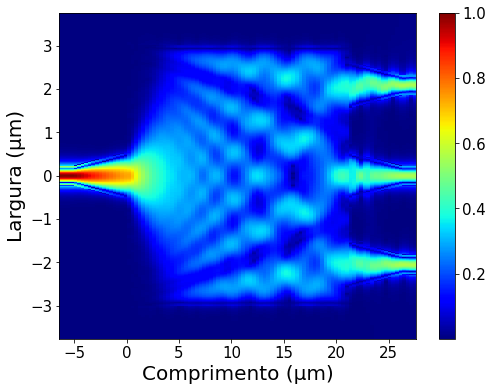

In [123]:


campo = lum.getresult("monitor", "field profile")
x = campo["x"]
y = campo["y"]
E = campo["E"]

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

plt.rcParams["figure.figsize"] = (8,6)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.xlabel('Comprimento (μm)',fontsize=20)
plt.ylabel('Largura (μm)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
#plt.savefig('Imagens/E linear.png')



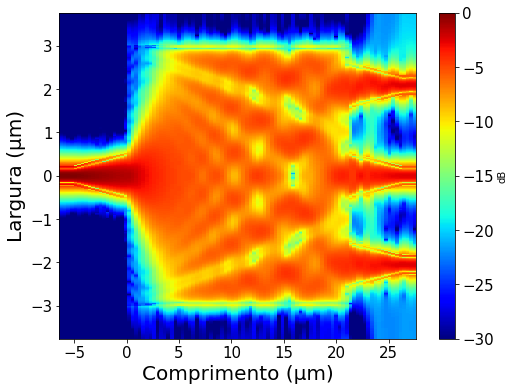

In [124]:
Elog = 10*np.log10(E)
plt.rcParams["figure.figsize"] = (8,6)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,Elog,cmap = 'jet',vmin=-30)
plt.xlabel('Comprimento (μm)',fontsize=20)
plt.ylabel('Largura (μm)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar(label='dB')
cbar.ax.tick_params(labelsize=15)
#plt.savefig('Imagens/E Log.png')

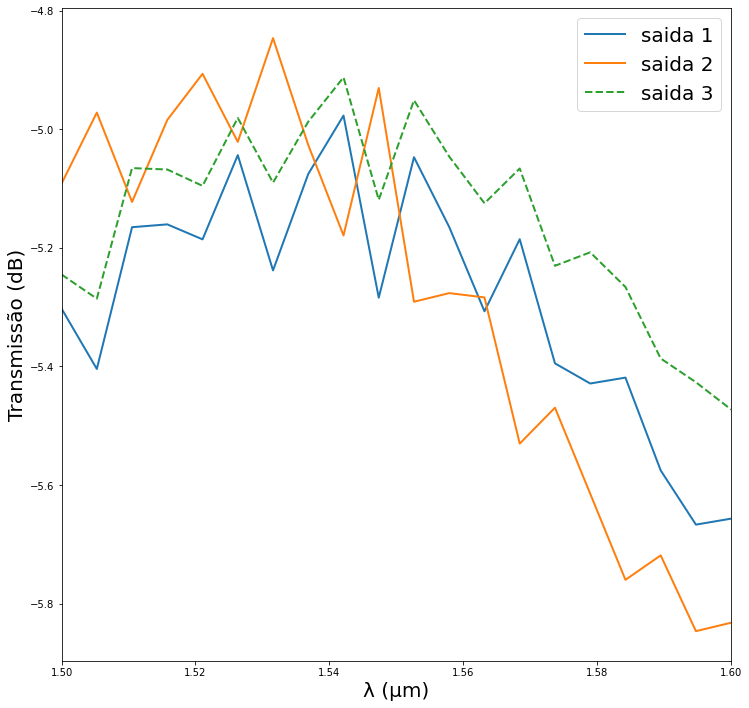

In [125]:
lum.setemeanalysis('wavelength sweep', 1)
lum.setemeanalysis('start wavelength', 1.5e-6)
lum.setemeanalysis('stop wavelength', 1.6e-6)
lum.setemeanalysis('number of wavelength points', 20)

lum.emesweep('wavelength sweep')

onda = lum.getemesweep('S_wavelength_sweep')

lmbd = onda['wavelength']*1e6

s21 = abs(onda['s21'])**2
s31 = abs(onda['s31'])**2
s41 = abs(onda['s41'])**2

plt.figure(figsize = (12,12))
plt.plot(lmbd, 10*np.log10(s21), linewidth = 2, label = "saida 1")
plt.plot(lmbd, 10*np.log10(s31), linewidth = 2, label = "saida 2")
plt.plot(lmbd, 10*np.log10(s41), '--', linewidth = 2, label = "saida 3")
plt.xlabel('λ (μm)', fontsize = 20)
plt.ylabel('Transmissão (dB)', fontsize = 20)
plt.xlim(1.5, 1.6)
#plt.ylim(-9, -6)
plt.legend(fontsize = 20)
#plt.grid(True)
#plt.savefig('Imagens/Wavelength sweep.png')

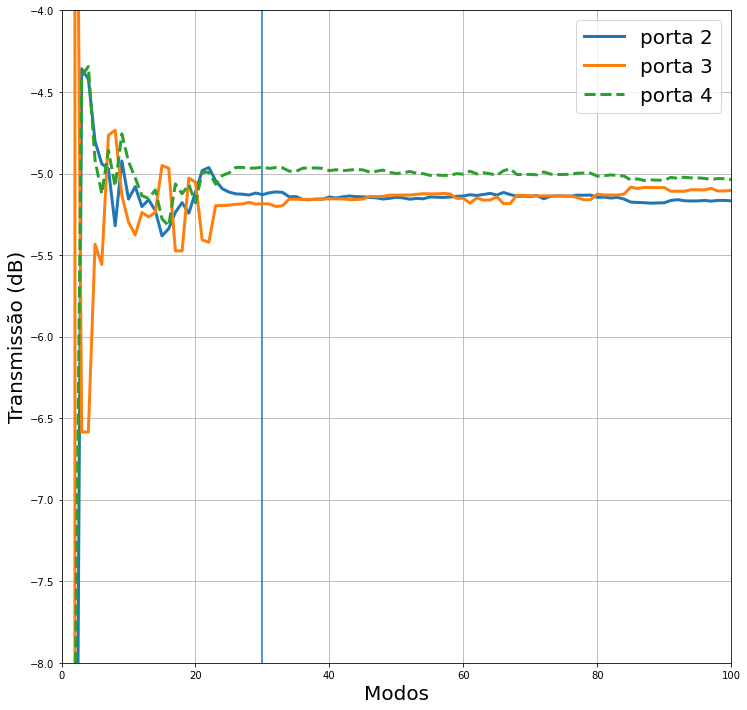

In [126]:
#sweep nModos

lum.setemeanalysis('Mode convergence sweep', 1)
lum.setemeanalysis('start mode', 1)
lum.setemeanalysis('mode interval', 1)

lum.emesweep('mode convergence sweep')

mode = lum.getemesweep('S_mode_convergence_sweep')
x = mode['modes']

s21 = abs(mode['s21'])**2
s31 = abs(mode['s31'])**2
s41 = abs(mode['s41'])**2

plt.figure(figsize = (12,12))
plt.vlines(30, -8, -4)
plt.plot(x, 10*np.log10(s21), linewidth = 3, label = 'porta 2')
plt.plot(x, 10*np.log10(s31), linewidth = 3, label = 'porta 3')
plt.plot(x, 10*np.log10(s41), '--', linewidth = 3, label = 'porta 4')
plt.xlabel('Modos', fontsize = 20)
plt.ylabel('Transmissão (dB)', fontsize = 20)
plt.xlim(0, 100)
plt.ylim(-8, -4)
plt.legend(fontsize = 20)
plt.grid(True)
# plt.savefig('Imagens/Mode sweep.png')

In [127]:
print(compMMI)

2.124667718863327e-05


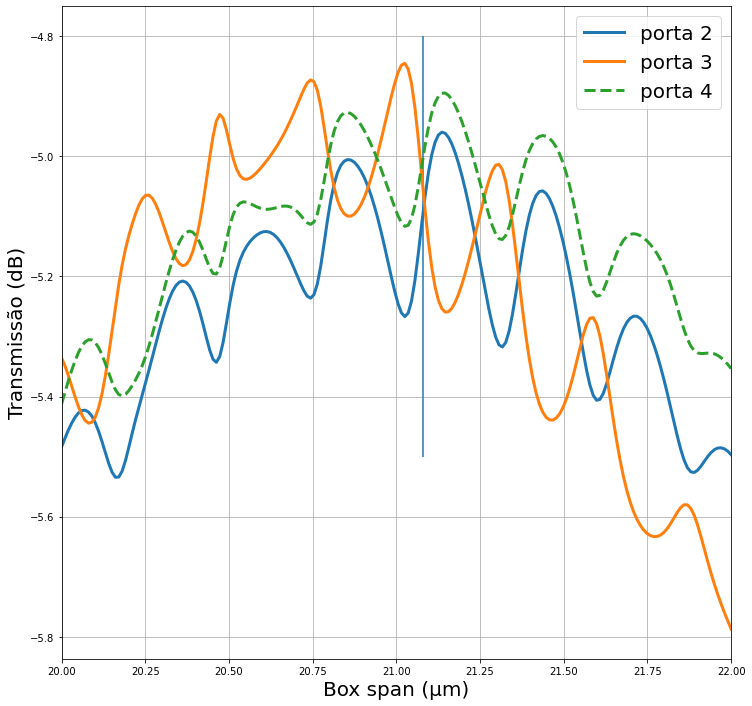

In [129]:
limInf = 20
limSup = 22

lum.setemeanalysis('Propagation sweep', 1)
lum.setemeanalysis('parameter', 'group span 2')
lum.setemeanalysis('start', limInf*1e-6)
lum.setemeanalysis('stop', limSup*1e-6)
lum.setemeanalysis('number of points', 200)

lum.emesweep()

S = lum.getemesweep('S')
span = S['group_span_2']*1e6

s21 = abs(S['s21'])**2
s31 = abs(S['s31'])**2
s41 = abs(S['s41'])**2

plt.figure(figsize = (12,12))
plt.vlines(21.08, -5.5, -4.8)
plt.plot(span, 10*np.log10(s21), linewidth = 3, label = 'porta 2')
plt.plot(span, 10*np.log10(s31), linewidth = 3, label = 'porta 3')
plt.plot(span, 10*np.log10(s41), '--', linewidth = 3, label = 'porta 4')
plt.xlabel('Box span (μm)', fontsize = 20)
plt.ylabel('Transmissão (dB)', fontsize = 20)
plt.xlim(limInf, limSup)
# plt.ylim(-8, -6)
plt.legend(fontsize = 20)
plt.grid(True)
# plt.savefig('Imagens/Propagation sweep.png')



,1,2,3,4
1,-38.445132,-5.184091,-5.064079,-5.050615
2,-5.167084,-23.445740,-26.587006,-20.861730
3,-5.103594,-27.144740,-21.011458,-25.701341
4,-5.037512,-20.897526,-25.408340,-22.760556


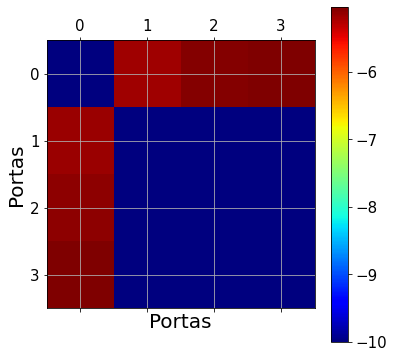

In [130]:
n = 10
Wg = np.linspace(1.2e-6, 1.3e-6, n)

s21 = np.zeros([10,n])
s31 = np.zeros([10,n])
s41 = np.zeros([10,n])
s51 = np.zeros([10,n])lum.setemeanalysis('group spans', np.transpose([compTP*1.25, compMMI, compTP*1.25]))
lum.emepropagate()
smatrix = 10*np.log10(abs(lum.getresult('EME', 'user s matrix'))**2)

plt.matshow(smatrix,cmap = 'jet',vmin=-10)
plt.xlabel('Portas',fontsize=20)
plt.ylabel('Portas',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.grid()
plt.savefig('Imagens/MatrizS')

lin = [1, 2, 3, 4]
col = [1, 2, 3, 4]
df = pd.DataFrame(smatrix, index = lin, columns = col)
df

In [131]:
compMMI = 21.08e-6
nmodosMMI = 40

,1,2,3,4
1,-36.950748,-5.067088,-5.114331,-4.973578
2,-5.092452,-26.249720,-24.250233,-20.709703
3,-5.056513,-24.945103,-20.051920,-24.650402
4,-5.001102,-20.776287,-24.360479,-25.476109


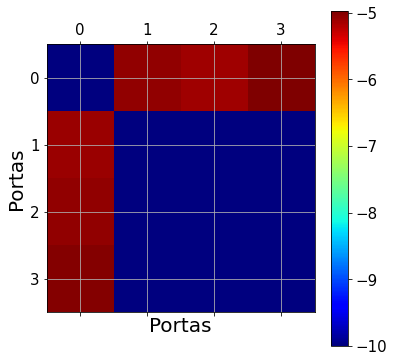

In [132]:
lum.setemeanalysis('group spans', np.transpose([compTP*1.25, compMMI, compTP*1.25]))
lum.emepropagate()
smatrix = 10*np.log10(abs(lum.getresult('EME', 'user s matrix'))**2)

plt.matshow(smatrix,cmap = 'jet',vmin=-10)
plt.xlabel('Portas',fontsize=20)
plt.ylabel('Portas',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.grid()
plt.savefig('Imagens/MatrizS')

lin = [1, 2, 3, 4]
col = [1, 2, 3, 4]
df = pd.DataFrame(smatrix, index = lin, columns = col)
df

In [134]:
print(largTP*3)

3.1768931443934656e-06


# largMMI

In [173]:
nSimu = 10


inicioMMI = 0
#compMMI = 37.2947e-6
compMMI = 21.08e-6
#largMMI = 6e-6
largMMI = np.linspace(5.5e-6, 6.5e-6, nSimu)
zmin = 0
zspan = 220e-9
zspanMMI = 8e-6
ycentro = 0
parametros = CalculaMMI(largMMI, 3.476, 1.444, 1550e-9, 0, 3)



largWG = .45e-6
bufferWG = 4e-6
compTP = 5e-6
#largTP = 0.609367e-6
posSaida = 1.5e-6

material = "Si (Silicon) - Palik";
BGmaterial = "SiO2 (Glass) - Palik";


#nomes = ["MMImeio", "Entrada", "Saida1", "Saida2", "Saida3", "EntradaTP", "Saida1TP", "Saida2TP", "Saida3TP"]
#mesh = ["meshE", "meshS1", "meshS2", "meshS3"]

ncellsTP = 20
nmodosTP = 10
# nmodosMMI = 100
nmodosMMI = 40
mcy = 375
mcz = 150

meshY = 2
meshZ = 4


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


compMMI = parametros[0]
largTP = parametros[2]
posSaida = parametros[3]


zmax = zmin + zspan
inicTPS = compMMI + inicioMMI
fimTPS = compTP + inicTPS
fimTPS1 = compTP + inicTPS
fimTPS2 = compTP + inicTPS
fimTPS3 = compTP + inicTPS
largTPE = largTP
largTPS1 = largTP
largTPS2 = largTP
largTPS3 = largTP
posSaida1 = ycentro + posSaida
posSaida2 = ycentro
posSaida3 = ycentro - posSaida
# posSaida1 = ycentro + posSaida + 0.59e-6
# posSaida2 = ycentro
# posSaida3 = ycentro - posSaida - 0.55e-6



s21 = np.zeros([10,nSimu])
s31 = np.zeros([10,nSimu])
s41 = np.zeros([10,nSimu])
centMx = (lum.getnamed(mesh[2], 'x span'))/2


In [ ]:

#nomes = ["MMImeio", "Entrada", "Saida1", "Saida2", "Saida3", "EntradaTP", "Saida1TP", "Saida2TP", "Saida3TP"]
#mesh = ["meshE", "meshS1", "meshS2", "meshS3"]

In [174]:

for i in range(nSimu):
    lum.switchtolayout()

    lum.setnamed("meshMMI", 'x min', inicioMMI)
    lum.setnamed("meshMMI", 'x max', compMMI[i])
    lum.setnamed("meshMMI", 'y span', largMMI[i])
    lum.setnamed(nomes[0], 'y span', largMMI[i])
    lum.setnamed('EME', 'y span', largMMI[i] + 2e-6)
    lum.setnamed(nomes[0], 'x max', compMMI[i])
    lum.setnamed('EME', 'group spans', np.transpose([compTP*1.25, compMMI[i], compTP*1.25]))
    lum.setnamed('monitor', 'x max', compMMI[i] + 2.5*compTP)
    lum.setnamed('monitor', 'y span', largMMI[i] + 4e-6)
    lum.setnamed(nomes[6], 'x', compMMI[i] + compTP/2)
    lum.setnamed(nomes[6], 'y', posSaida1[i])
    lum.setnamed(nomes[2], 'x', compMMI[i] + compTP + bufferWG/2)
    lum.setnamed(nomes[2], 'y', posSaida1[i])
    lum.setnamed(mesh[1], 'x', compMMI[i] + compTP + centMx)
    lum.setnamed(mesh[1], 'y', posSaida1[i])
    lum.setnamed(nomes[7], 'x', compMMI[i] + compTP/2)
    lum.setnamed(nomes[7], 'y', posSaida2)
    lum.setnamed(nomes[3], 'x', compMMI[i] + compTP + bufferWG/2)
    lum.setnamed(nomes[3], 'y', posSaida2)
    lum.setnamed(mesh[2], 'x', compMMI[i] + compTP + centMx)
    lum.setnamed(mesh[2], 'y', posSaida2)
    lum.setnamed(nomes[8], 'x', compMMI[i] + compTP/2)
    lum.setnamed(nomes[8], 'y', posSaida3[i])
    lum.setnamed(nomes[4], 'x', compMMI[i] + compTP + bufferWG/2)
    lum.setnamed(nomes[4], 'y', posSaida3[i])
    lum.setnamed(mesh[3], 'x', compMMI[i] + compTP + centMx)
    lum.setnamed(mesh[3], 'y', posSaida3[i])
    lum.setnamed('EME::Ports::port_2', 'y', posSaida1[i])
    lum.setnamed('EME::Ports::port_3', 'y', posSaida2)
    lum.setnamed('EME::Ports::port_4', 'y', posSaida3[i])
    
    
    lum.run()
    lum.emepropagate()

    lum.setemeanalysis('wavelength sweep', 1)
    lum.setemeanalysis('start wavelength', 1.54e-6)
    lum.setemeanalysis('stop wavelength', 1.56e-6)
    lum.setemeanalysis('number of wavelength points', 10)

    lum.emesweep('wavelength sweep')

    wave = lum.getemesweep('S_wavelength_sweep')

    lmbd = wave['wavelength']*1e6

    s21[:,i] = abs(wave['s21'])**2
    s31[:,i] = abs(wave['s31'])**2
    s41[:,i] = abs(wave['s41'])**2

    print('Completed = {}/{}'.format(i+1,nSimu))

Completed = 1/10


KeyboardInterrupt: 

In [ ]:


loss = 10*np.log10(s21 + s31 + s41)
plt.figure(figsize = (12,12))
for i in range(nSimu):
    plt.plot(lmbd, loss[:,i], label = 'y span = {:.2f} μm'.format(largMMI[i]*1e6,3), linewidth = 3)
plt.xlim(1.54, 1.56)
# plt.ylim(-1, 0)
plt.xlabel('λ (μm)', fontsize = 15)
plt.ylabel('Insertion Loss (dB)', fontsize = 15)
plt.grid(True)
plt.legend(loc ='upper left', fontsize = 15)
plt.show()
# plt.savefig('Imagens/Loss x Box span')

if nSimu%3:
    altura = nSimu/3 + 1
else:
    altura = nSimu

if nSimu < 3:
    largura = nSimu
else:
    largura = 3

fig, axs = plt.subplots(largura,altura)
for i in range(nSimu):
    axs[i%3, i/3].set_title('y span = {:.2f} μm'.format(largMMI[i]*1e6,3))
    axs[i%3, i/3].plot(lmbd, s21[:, i], label = 'saida {} μm'.format(1))
    axs[i%3, i/3].plot(lmbd, s31[:, i], label = 'saida {} μm'.format(2))
    axs[i%3, i/3].plot(lmbd, s41[:, i], label = 'saida {} μm'.format(3))



# posSaida

In [ ]:
nSimu = 10

nSimu = 10


inicioMMI = 0
#compMMI = 37.2947e-6
compMMI = 21.08e-6
#largMMI = 6e-6
largMMI = ;;
zmin = 0
zspan = 220e-9
zspanMMI = 8e-6
ycentro = 0
parametros = CalculaMMI(largMMI, 3.476, 1.444, 1550e-9, 0, 3)



largWG = .45e-6
bufferWG = 4e-6
compTP = 5e-6
#largTP = 0.609367e-6
#posSaida = largMMI/4

material = "Si (Silicon) - Palik";
BGmaterial = "SiO2 (Glass) - Palik";


#nomes = ["MMImeio", "Entrada", "Saida1", "Saida2", "Saida3", "EntradaTP", "Saida1TP", "Saida2TP", "Saida3TP"]
#mesh = ["meshE", "meshS1", "meshS2", "meshS3"]

ncellsTP = 20
nmodosTP = 10
# nmodosMMI = 100
nmodosMMI = 40
mcy = 375
mcz = 150

meshY = 2
meshZ = 4


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


compMMI = parametros[0]
largTP = parametros[2]
posSaida = parametros[3]

Psup = 1.1*posSaida
Pinf = 0.9*posSaida

posSaida = np.linspace(Pinf, Psup, nSimu)

zmax = zmin + zspan
inicTPS = compMMI + inicioMMI
fimTPS = compTP + inicTPS
fimTPS1 = compTP + inicTPS
fimTPS2 = compTP + inicTPS
fimTPS3 = compTP + inicTPS
largTPE = largTP
largTPS1 = largTP
largTPS2 = largTP
largTPS3 = largTP
posSaida1 = ycentro + posSaida
posSaida2 = ycentro
posSaida3 = ycentro - posSaida
# posSaida1 = ycentro + posSaida + 0.59e-6
# posSaida2 = ycentro
# posSaida3 = ycentro - posSaida - 0.55e-6



s21 = np.zeros([10,nSimu])
s31 = np.zeros([10,nSimu])
s41 = np.zeros([10,nSimu])



In [ ]:


for i in range(nSimu):
    lum.switchtolayout()
    
    lum.setnamed(nomes[5], 'y', posSaida2[i])
    lum.setnamed(nomes[1], 'y', posSaida2[i])
    lum.setnamed(mesh[0], 'y', posSaida2[i])
    lum.setnamed(nomes[6], 'y', posSaida1[i])
    lum.setnamed(nomes[2], 'y', posSaida1[i])
    lum.setnamed(mesh[1], 'y', posSaida1[i])
    lum.setnamed(nomes[7], 'y', posSaida2[i])
    lum.setnamed(nomes[3], 'y', posSaida2[i])
    lum.setnamed(mesh[2], 'y', posSaida2[i])
    lum.setnamed(nomes[8], 'y', posSaida3[i])
    lum.setnamed(nomes[4], 'y', posSaida3[i])
    lum.setnamed(mesh[3], 'y', posSaida3[i])

    lum.run()
    lum.emepropagate()

    lum.setemeanalysis('wavelength sweep', 1)
    lum.setemeanalysis('start wavelength', 1.54e-6)
    lum.setemeanalysis('stop wavelength', 1.56e-6)
    lum.setemeanalysis('number of wavelength points', 10)

    lum.emesweep('wavelength sweep')

    wave = lum.getemesweep('S_wavelength_sweep')

    lmbd = wave['wavelength']*1e6

    s21[:,i] = abs(wave['s21'])**2
    s31[:,i] = abs(wave['s31'])**2
    s41[:,i] = abs(wave['s41'])**2

    print('Completed = {}/{}'.format(i+1,nSimu))



In [ ]:


loss = 10*np.log10(s21 + s31 + s41)
plt.figure(figsize = (12,12))
for i in range(10):
    plt.plot(lmbd, loss[:,i], label = 'posSaida = {:.2f} μm'.format(posSaida[i]*1e6,3), linewidth = 3)
plt.xlim(1.54, 1.56)
# plt.ylim(-1, 0)
plt.xlabel('λ (μm)', fontsize = 15)
plt.ylabel('Insertion Loss (dB)', fontsize = 15)
plt.grid(True)
plt.legend(loc ='upper left', fontsize = 15)
plt.show()
# plt.savefig('Imagens/Loss x Taper position span')



# largTP

In [ ]:
nSimu = 10


inicioMMI = 0
#compMMI = 37.2947e-6
compMMI = 21.08e-6
#largMMI = 6e-6
largMMI = ;
zmin = 0
zspan = 220e-9
zspanMMI = 8e-6
ycentro = 0
parametros = CalculaMMI(largMMI, 3.476, 1.444, 1550e-9, 0, 3)



largWG = .45e-6
bufferWG = 4e-6
compTP = 5e-6
#largTP = 0.609367e-6
posSaida = 1.5e-6

material = "Si (Silicon) - Palik";
BGmaterial = "SiO2 (Glass) - Palik";


#nomes = ["MMImeio", "Entrada", "Saida1", "Saida2", "Saida3", "EntradaTP", "Saida1TP", "Saida2TP", "Saida3TP"]
#mesh = ["meshE", "meshS1", "meshS2", "meshS3"]

ncellsTP = 20
nmodosTP = 10
# nmodosMMI = 100
nmodosMMI = 40
mcy = 375
mcz = 150

meshY = 2
meshZ = 4


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



compMMI = parametros[0]
largTP = parametros[2]
posSaida = parametros[3]


Lmax = largMMI/3
Lmin = largWG
deltaL = 0.1*(Lmax - Lmin)/2
Lsup = largTP + deltaL
Linf = largTP - deltaL


largTP = np.linspace(Linf, Lsup, nSimu)

zmax = zmin + zspan
inicTPS = compMMI + inicioMMI
fimTPS = compTP + inicTPS
fimTPS1 = compTP + inicTPS
fimTPS2 = compTP + inicTPS
fimTPS3 = compTP + inicTPS
largTPE = largTP
largTPS1 = largTP
largTPS2 = largTP
largTPS3 = largTP
posSaida1 = ycentro + posSaida
posSaida2 = ycentro
posSaida3 = ycentro - posSaida
# posSaida1 = ycentro + posSaida + 0.59e-6
# posSaida2 = ycentro
# posSaida3 = ycentro - posSaida - 0.55e-6



s21 = np.zeros([10,nSimu])
s31 = np.zeros([10,nSimu])
s41 = np.zeros([10,nSimu])


In [ ]:


for i in range(nSimu):
    lum.switchtolayout()
    
    lum.setnamed(nomes[5], 'width_r', largTP[i])
    lum.setnamed(nomes[6], 'width_l', largTP[i])
    lum.setnamed(nomes[7], 'width_l', largTP[i])
    lum.setnamed(nomes[8], 'width_l', largTP[i])

    lum.run()
    lum.emepropagate()

    lum.setemeanalysis('wavelength sweep', 1)
    lum.setemeanalysis('start wavelength', 1.54e-6)
    lum.setemeanalysis('stop wavelength', 1.56e-6)
    lum.setemeanalysis('number of wavelength points', 10)

    lum.emesweep('wavelength sweep')

    wave = lum.getemesweep('S_wavelength_sweep')

    lmbd = wave['wavelength']*1e6

    s21[:,i] = abs(wave['s21'])**2
    s31[:,i] = abs(wave['s31'])**2
    s41[:,i] = abs(wave['s41'])**2

    print('Completed = {}/{}'.format(i+1,nSimu))



# Temperatura

In [ ]:
si_T = 'silicon_dT'
Temp = np.linspace(253.15, 353.15, 6)

s21 = np.zeros([10,6])
s31 = np.zeros([10,6])
s41 = np.zeros([10,6])

In [ ]:


lum.switchtolayout()

lum.setnamed(nomes[0], 'material', si_T)
lum.setnamed(nomes[1], 'material', si_T)
lum.setnamed(nomes[2], 'material', si_T)
lum.setnamed(nomes[3], 'material', si_T)
lum.setnamed(nomes[4], 'material', si_T)
lum.setnamed(nomes[5], 'material', si_T)
lum.setnamed(nomes[6], 'material', si_T)
lum.setnamed(nomes[7], 'material', si_T)
lum.setnamed(nomes[8], 'material', si_T)



In [ ]:
for i in range(6):
    lum.switchtolayout()

    lum.setnamed('EME', 'simulation temperature', Temp[i])

    lum.run()

    lum.setemeanalysis('group spans', np.transpose([compTP*1.25, compMMI, compTP*1.25]))
    lum.emepropagate()

    lum.setemeanalysis('wavelength sweep', 1)
    lum.setemeanalysis('start wavelength', 1.54e-6)
    lum.setemeanalysis('stop wavelength', 1.56e-6)
    lum.setemeanalysis('number of wavelength points', 10)

    lum.emesweep('wavelength sweep')

    wave = lum.getemesweep('S_wavelength_sweep')

    lmbd = wave['wavelength']*1e6

    s21[:,i] = abs(wave['s21'])**2
    s31[:,i] = abs(wave['s31'])**2
    s41[:,i] = abs(wave['s41'])**2

    print('Completed = {}/{}'.format(i+1,6))

In [ ]:
loss = 10*np.log10(s21 + s31 + s41)
plt.figure(figsize = (12,12))
for i in range(6):
    plt.plot(lmbd, loss[:,i], label = 'T = {:.2f} K'.format(Temp[i],3), linewidth = 3)
plt.xlim(1.54, 1.56)
plt.ylim(-1, 0)
plt.xlabel('λ (μm)', fontsize = 15)
plt.ylabel('Insertion Loss (dB)', fontsize = 15)
plt.grid(True)
plt.legend(loc ='upper left', fontsize = 15)
plt.show()
plt.savefig('Imagens/Loss x Temperature')